# Numba Compatible Distributions

Test each of the Numba compatible distributions.

In [1]:
import numba as nb
import numpy as np
from matplotlib import pyplot as plt

import laser_core.distributions as distributions


In [3]:
def plot_histogram(data: list[tuple[np.ndarray, str, str]], bins: int = 101) -> None:

    for d, label, color in data:
        plt.hist(d, bins=bins, density=True, alpha=0.6, color=color, label=label)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Histogram')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Beta

![beta distribution](media/beta-distribution.svg)


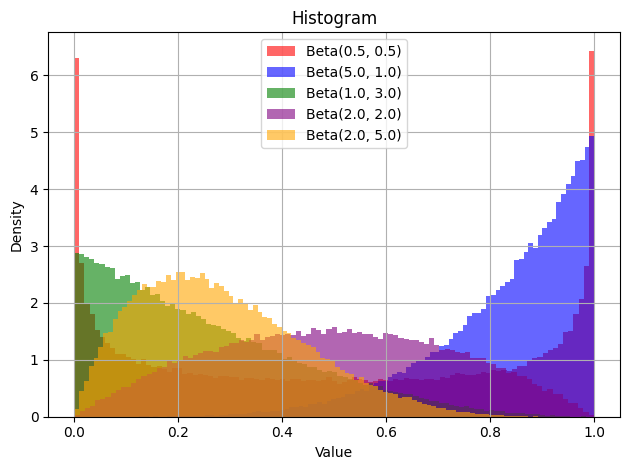

In [7]:
NSAMPLES = np.int32(100_000)

traces = []
for alpha, beta, color in [(0.5, 0.5, "red"), (5.0, 1.0, "blue"), (1.0, 3.0, "green"), (2.0, 2.0, "purple"), (2.0, 5.0, "orange")]:

    dist = distributions.beta(a=alpha, b=beta)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples, f'Beta({alpha}, {beta})', color))

plot_histogram(traces)


## Binomial

![binomial distribution](media/binomial-distribution.svg)


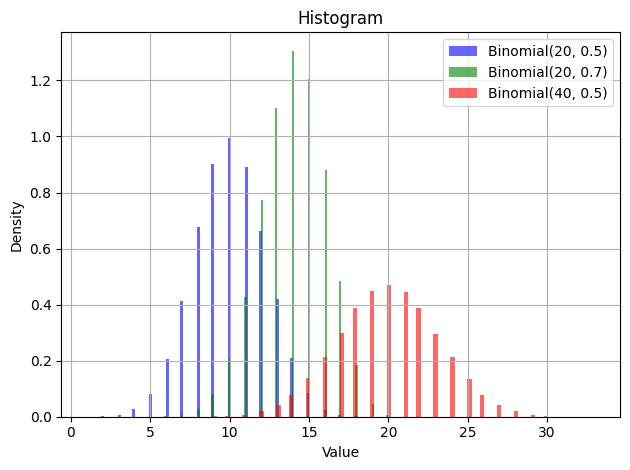

In [8]:
NSAMPLES = np.int32(100_000)

traces = []
for p, n, color in [(0.5, 20, "blue"), (0.7, 20, "green"), (0.5, 40, "red")]:

    dist = distributions.binomial(n=n, p=p)
    distributions.sample_ints(dist, samples := np.zeros(NSAMPLES, dtype=np.int32))

    traces.append((samples, f'Binomial({n}, {p})', color))

plot_histogram(traces)


## Exponential

![exponential distribution](media/exponential-distribution.svg)


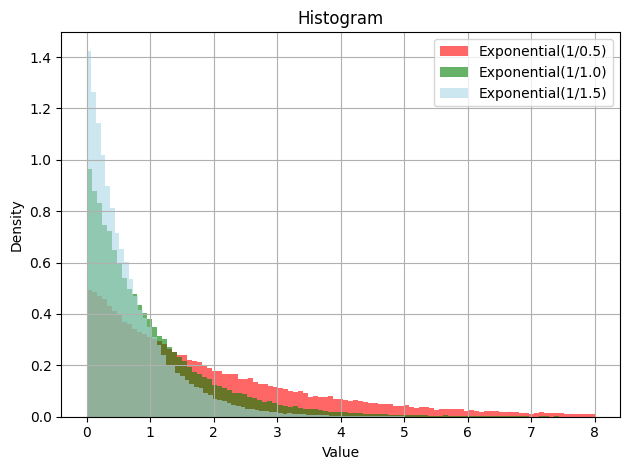

In [9]:
NSAMPLES = np.int32(100_000)

traces = []
for lamda, color in [(0.5, "red"), (1.0, "green"), (1.5, "lightblue")]:

    dist = distributions.exponential(scale=1/lamda)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[samples < 8], f'Exponential(1/{lamda})', color))

plot_histogram(traces)


## Gamma

![gamma distribution](media/gamma-distribution.svg)

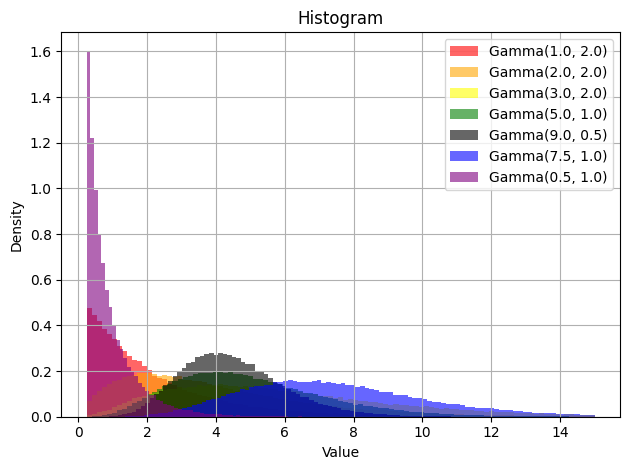

In [10]:
NSAMPLES = np.int32(100_000)

traces = []
for alpha, theta, color in [(1.0, 2.0, "red"), (2.0, 2.0, "orange"), (3.0, 2.0, "yellow"), (5.0, 1.0, "green"), (9.0, 0.5, "black"), (7.5, 1.0, "blue"), (0.5, 1.0, "purple")]:

    dist = distributions.gamma(shape=alpha, scale=theta)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[(samples > 0.25) & (samples <= 15)], f'Gamma({alpha}, {theta})', color))

plot_histogram(traces)


## Logistic

![logistic distribution](media/logistic-distribution.svg)


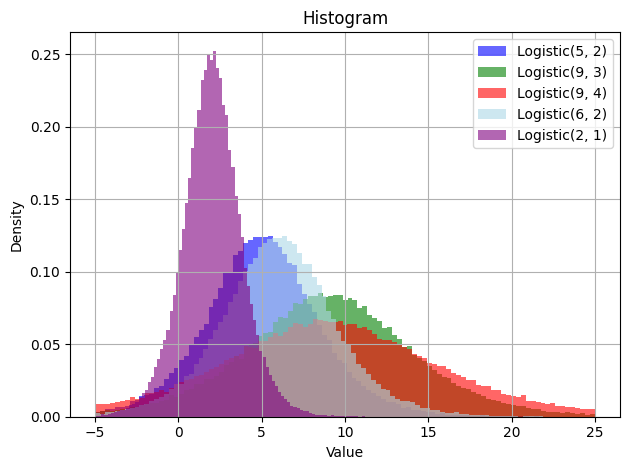

In [11]:
NSAMPLES = np.int32(100_000)

traces = []
for mu, s, color in [(5, 2, "blue"), (9, 3, "green"), (9, 4, "red"), (6, 2, "lightblue"), (2, 1, "purple")]:

    dist = distributions.logistic(loc=mu, scale=s)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[(samples >= -5) & (samples <= 25)], f'Logistic({mu}, {s})', color))

plot_histogram(traces)


## LogNormal

![log-normal distribution](media/log-normal-distribution.png)


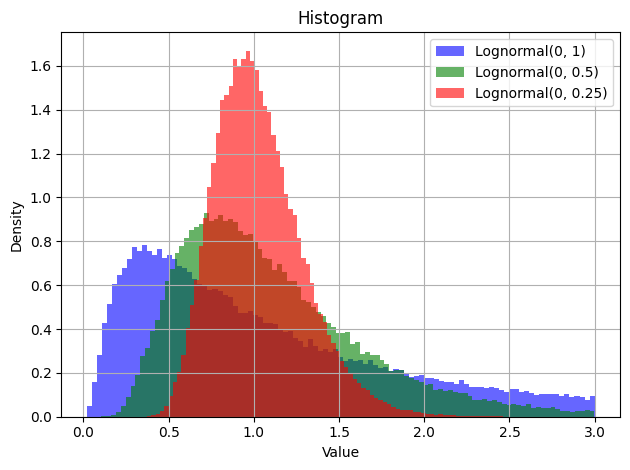

In [12]:
NSAMPLES = np.int32(100_000)

traces = []
for mu, sigma, color in [(0, 1, "blue"), (0, 0.5, "green"), (0, 0.25, "red")]:

    dist = distributions.lognormal(mean=mu, sigma=sigma)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[samples <= 3], f'Lognormal({mu}, {sigma})', color))

plot_histogram(traces)


## Multinomial

## NegativeBinomial

## Normal

![normal distribution](media/normal-distribution.svg)


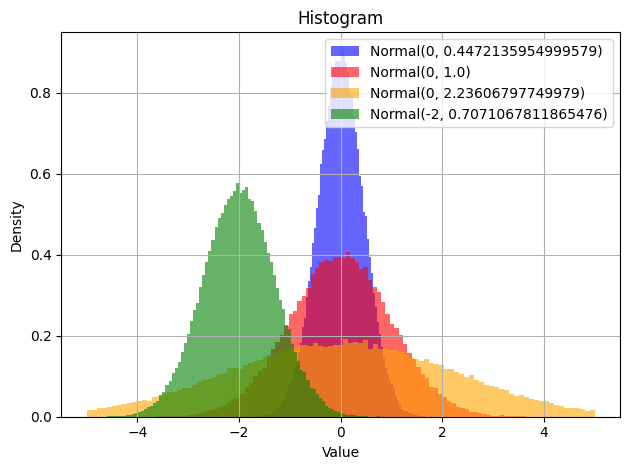

In [13]:
NSAMPLES = np.int32(100_000)

traces = []
for mu, sigmasq, color in [(0, 0.2, "blue"), (0, 1.0, "red"), (0, 5.0, "orange"), (-2, 0.5, "green")]:

    dist = distributions.normal(loc=mu, scale=np.sqrt(sigmasq))
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[(samples >= -5) & (samples <= 5)], f'Normal({mu}, {np.sqrt(sigmasq)})', color))

plot_histogram(traces)


## Poisson

![Poisson distribution](media/poisson-distribution.svg)


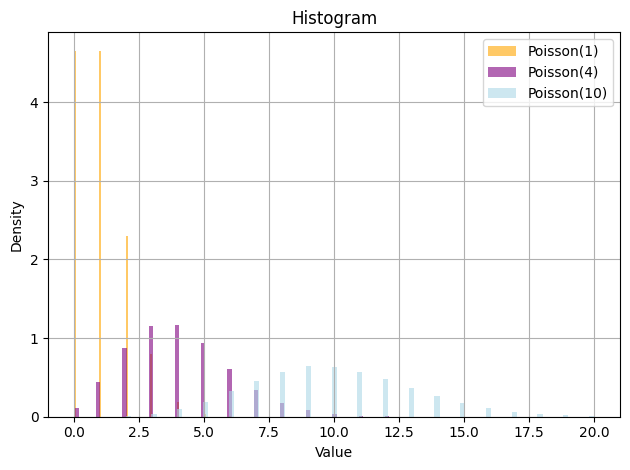

In [14]:
NSAMPLES = np.int32(100_000)

traces = []
for lamda, color in [(1, "orange"), (4, "purple"), (10, "lightblue")]:

    dist = distributions.poisson(lam=lamda)
    distributions.sample_ints(dist, samples := np.zeros(NSAMPLES, dtype=np.int32))

    traces.append((samples[samples <= 20], f'Poisson({lamda})', color))

plot_histogram(traces)


## Uniform

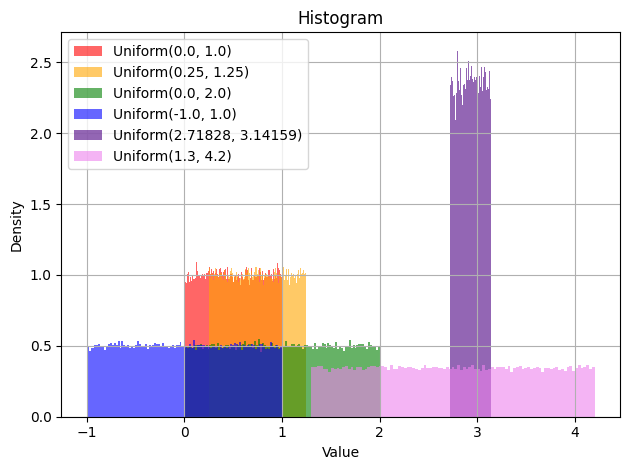

In [15]:
NSAMPLES = np.int32(100_000)

traces = []
for low, high, color in [(0.0, 1.0, "red"), (0.25, 1.25, "orange"), (0.0, 2.0, "green"), (-1.0, 1.0,"blue"), (2.71828, 3.14159, "indigo"), (1.30, 4.20, "violet")]:

    dist = distributions.uniform(low=low, high=high)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples, f'Uniform({low}, {high})', color))

plot_histogram(traces)


## Weibull

![Weibull distribution](media/weibull-distribution.svg)


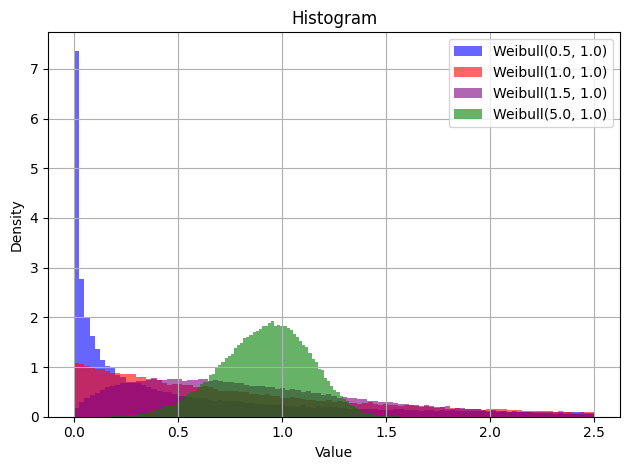

In [16]:
NSAMPLES = np.int32(100_000)

traces = []
for k, lamda, color in [(0.5, 1.0, "blue"), (1.0, 1.0, "red"), (1.5, 1.0, "purple"), (5.0, 1.0, "green")]:

    dist = distributions.weibull(a=k, lam=lamda)
    distributions.sample_floats(dist, samples := np.zeros(NSAMPLES, dtype=np.float32))

    traces.append((samples[samples <= 2.5], f'Weibull({k}, {lamda})', color))

plot_histogram(traces)
